In [129]:
%load_ext autoreload
%autoreload 2


from synthetic_data import SyntheticCalciumDataGenerator, LorenzSystem, EmbeddedLowDNetwork
from infer_latent import plot_3d
import yaml
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
params = yaml.load(open('./synth_data/lorenz_params.yaml'), Loader=yaml.Loader)

In [131]:
lorenz = LorenzSystem(num_inits= params['inits'],
                      dt= params['dt_sys'])

net = EmbeddedLowDNetwork(low_d_system = lorenz,
                          net_size = params['cells'],
                          base_rate = params['rate_scale'],
                          dt = params['dt_sys'])

generator = SyntheticCalciumDataGenerator(system     = net,
                                          seed       = 12345,
                                          trainp     = params['trainp'],
                                          burn_steps = 1000,
                                          num_steps  = 100,
                                          num_trials = params['trials'],
                                          tau_cal    = 0.3,
                                          dt_cal     = 0.1,
                                          sigma      = 0.2)

In [132]:
data_dict = generator.generate_dataset()

In [20]:
Z = data_dict['train_latent']

In [6]:
Z.shape

(1040, 100, 3)

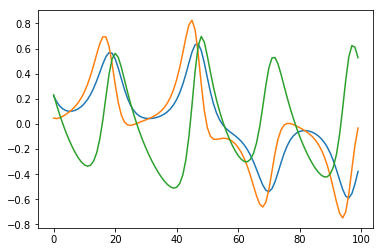

In [7]:
plt.plot(Z[2]);

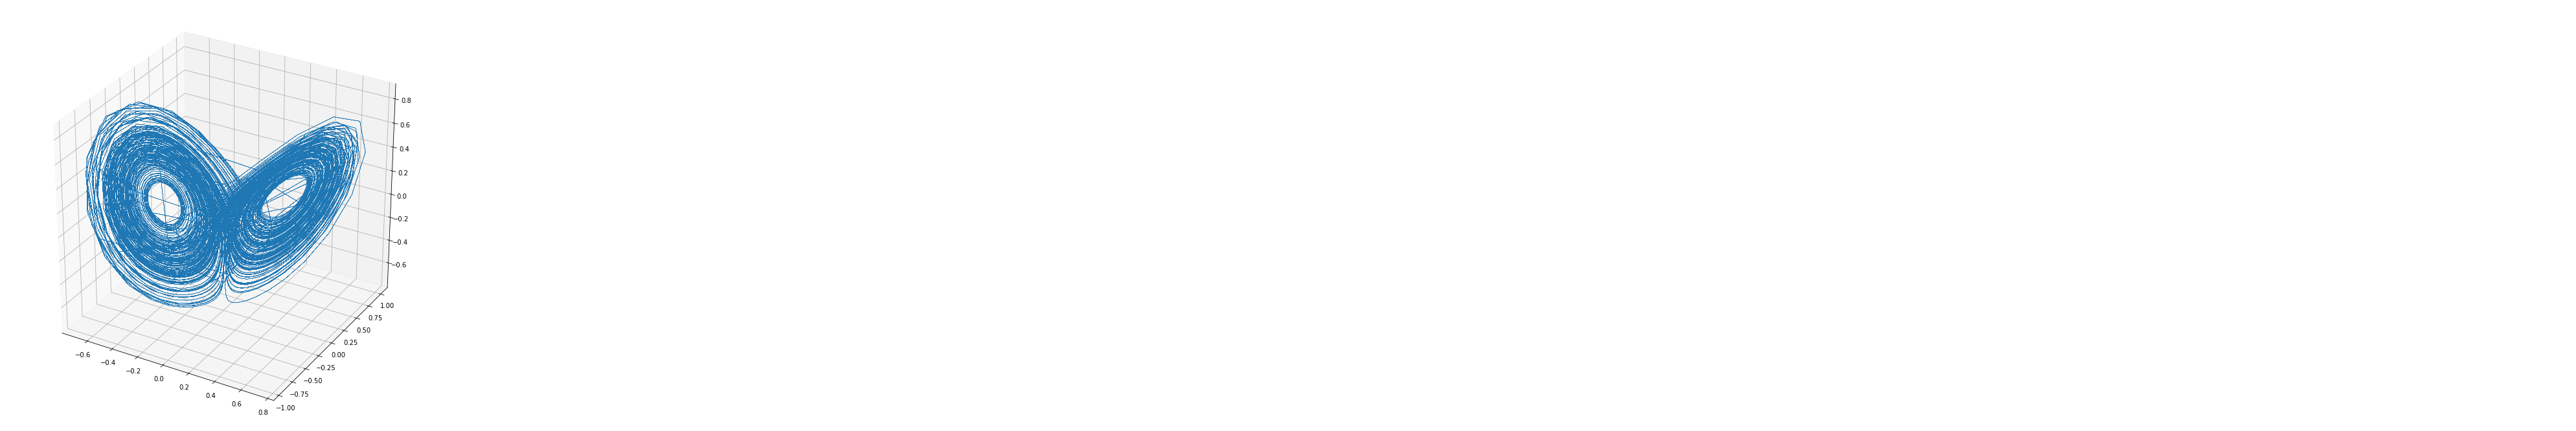

In [9]:
Zf = Z.reshape(np.prod(Z.shape[:-1]), Z.shape[-1]).T
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot(Zf[0], Zf[1], Zf[2], lw=.1)

In [10]:
R = data_dict['train_rates']

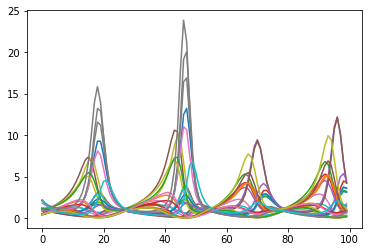

In [11]:
plt.plot(R[2]);

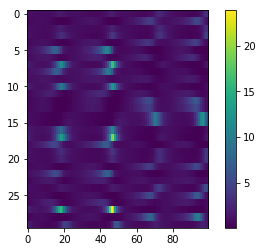

In [12]:
plt.imshow(R[2].T, aspect=4)
plt.colorbar()

In [14]:
S = data_dict['train_spikes']

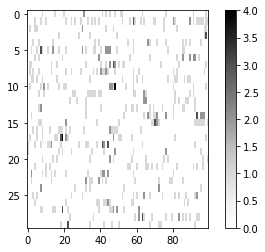

In [15]:
plt.imshow(S[2].T, cmap=plt.cm.Greys, aspect=4)
plt.colorbar()

In [14]:
S.sum()/(S.shape[0] * 10 * S.shape[2])

1.450551282051282

In [144]:
C = data_dict['train_calcium']

from synthetic_data import MLSpikeCalciumDataGenerator
mls_gen = MLSpikeCalciumDataGenerator(train_calcium=data_dict['train_calcium'], valid_calcium=data_dict['valid_calcium'],
                                      n=2.0,
                                      A=1.0,
                                      gamma=0.01)

train_fluor_mlspike, valid_fluor_mlspike = mls_gen.generate_dataset()

In [149]:
train_fluor_mlspike.shape, data_dict['train_fluor_ar1'].shape

((1040, 100, 30), (1040, 100, 30))

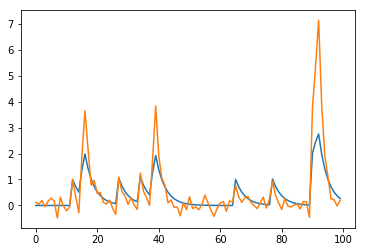

In [145]:
plt.plot(C[0, :, 0])
plt.plot(train_fluor_mlspike[0, :, 0])

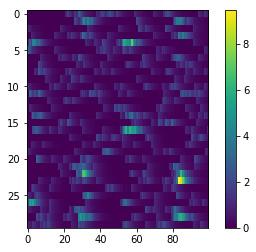

In [85]:
plt.imshow(C[2].T, aspect=4)
plt.colorbar()

In [86]:
F1 = data_dict['train_fluor_ar1']

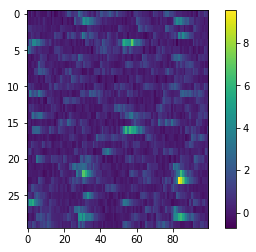

In [87]:
plt.imshow(F1[2].T, aspect=4)
plt.colorbar()

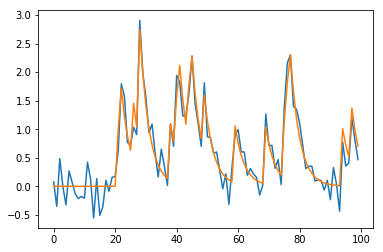

In [88]:
num_trials, num_steps, num_cells = F1.shape
data = F1.reshape(num_trials * num_steps, num_cells)
plt.plot(data[200:300,0])
plt.plot(C[2, :100, 0])

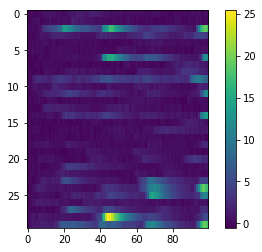

In [101]:
F2 = data_dict['train_fluor_mlspike']
plt.imshow(F2[2].T, aspect=4)
plt.colorbar()

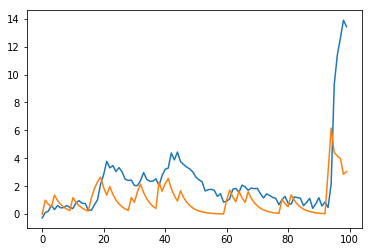

In [102]:
num_trials, num_steps, num_cells = F2.shape
data = F2.reshape(num_trials * num_steps, num_cells)
plt.plot(data[200:300,14])
plt.plot(C[2, :100, 14])

In [103]:
np.max(F2)

65.20596234327287

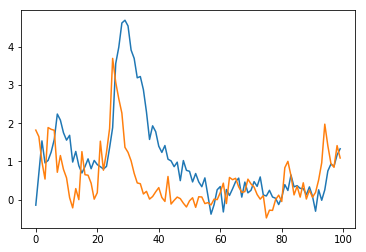

In [92]:
data = data.reshape(num_trials, num_steps, num_cells)
plt.plot(data[10, :, 20])
plt.plot(F1[10, :, 20])

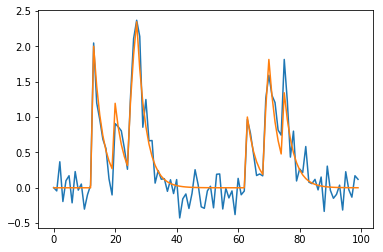

In [45]:
num_trials, num_steps, num_cells = F.shape
data = F.transpose(0, 2, 1)
data = data.reshape(num_trials * num_cells, num_steps)
plt.plot(data[5])
plt.plot(C[0, :, 5])

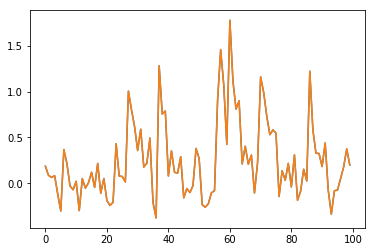

In [46]:
data = data.reshape(num_trials, num_cells, num_steps).transpose(0, 2, 1)
plt.plot(data[10, :, 20])
plt.plot(F[10, :, 20])

In [2]:
from synthetic_data import ChaoticNetwork, RandomPerturbation

params = yaml.load(open('./synth_data/chaotic-rnn_params.yaml'), Loader=yaml.FullLoader)

inputs = RandomPerturbation(t_span=[0.25, 0.75], scale=10)

net = ChaoticNetwork(num_inits= params['inits'],
                     base_rate= 1.0,
                     net_size = params['cells'],
                     weight_scale = 2.5,
                     dt=0.1,
                     inputs = inputs)

generator = SyntheticCalciumDataGenerator(system     = net,
                                          seed       = 12345,
                                          trainp     = params['trainp'],
                                          burn_steps = 0,
                                          num_steps  = 100,
                                          num_trials = params['trials'],
                                          tau_cal    = 0.3,
                                          dt_cal     = 0.1,
                                          sigma      = 0.2)

In [3]:
data_dict = generator.generate_dataset()

In [4]:
I = data_dict['train_inputs']

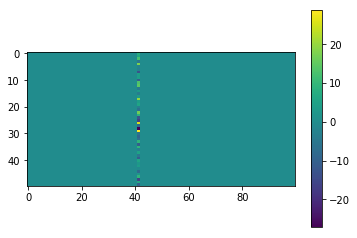

In [19]:
plt.imshow(I[1020].T)
plt.colorbar()

In [20]:
R = data_dict['train_rates']

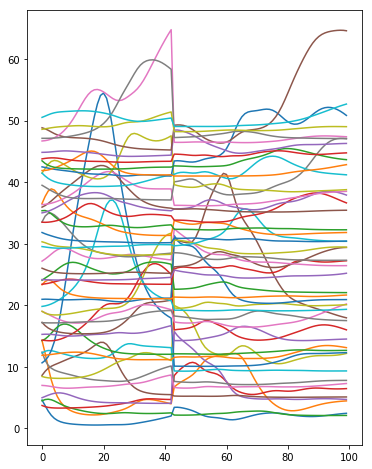

In [35]:
plt.figure(figsize=(6, 8))
plt.plot(R[20, :] + np.arange(50)) ;

In [208]:
R.min()

0.008682799786147317

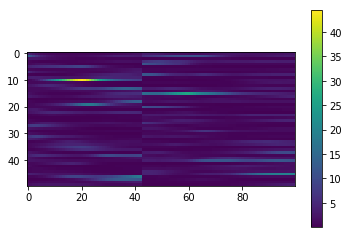

In [22]:
plt.imshow(R[20].T)
plt.colorbar()

In [27]:
S = data_dict['train_spikes']

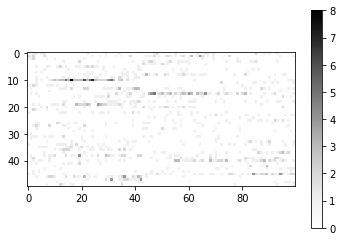

In [28]:
plt.imshow(S[20].T, cmap=plt.cm.Greys)
plt.colorbar()

In [34]:
C = data_dict['train_calcium']

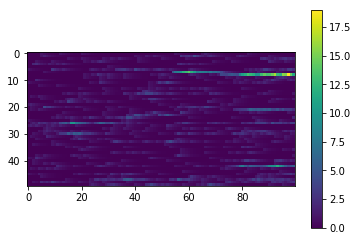

In [35]:
plt.imshow(C[2].T)
plt.colorbar()

In [5]:
F = data_dict['train_fluor']

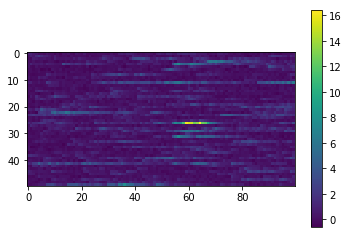

In [6]:
plt.imshow(F[2].T)
plt.colorbar()

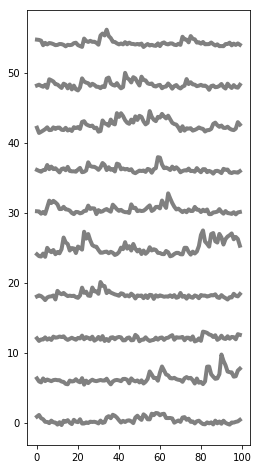

In [36]:
fig = plt.figure(figsize=(4, 8))
data_to_plot = F[2, :, ::5]
spacing = np.arange(len(data_to_plot.T)) * 6.0
plt.plot(data_to_plot + spacing, color='grey', lw=4)
fig.savefig('../Conferences/NeurIPS2020/example_dff.svg')

In [207]:
from utils import read_data

In [208]:
data_dict = read_data('./synth_data/lorenz_1000_mlspike_ou_t0.3_s4.0')

In [209]:
F = data_dict['train_fluor']
C = data_dict['train_calcium']
S = data_dict['train_spikes']
oC = data_dict['train_ocalcium']
oS = data_dict['train_ospikes']

b = data_dict['obs_bias_init']
dt = data_dict['dt']
tau = data_dict['obs_tau_init']

In [212]:
data_dict['obs_gain_init']

array([3.26243289, 3.03838955, 2.91404642, 1.77986199, 1.57135491,
       2.53369882, 2.88490546, 1.73879423, 1.63521704, 1.64014921,
       3.42504155, 1.61391806, 1.72972552, 2.72524699, 1.76904622,
       4.60967632, 1.72067513, 1.58357996, 1.54529603, 2.74121195,
       1.67179611, 2.492671  , 2.3150392 , 1.6236562 , 2.53960061,
       2.0262574 , 3.31562146, 2.94796573, 2.84692264, 4.0214278 ])

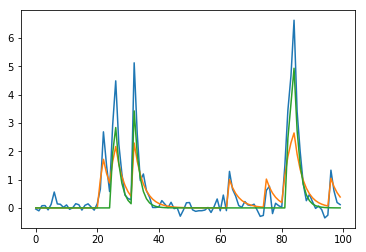

In [211]:
plt.plot(F[10, :, 10])
plt.plot(C[10, :, 10])
plt.plot(oC[10, :, 10] + b[10])

In [157]:
tau = dt * C[:, :-1] / (C[:, :-1] - C[:, 1:])

NameError: name 'dt' is not defined

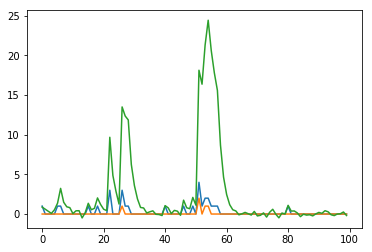

In [162]:
plt.plot(S[0, :, 0])
plt.plot(oS[0, :, 0])
plt.plot(F[0, :, 0])

In [163]:
import oasis

/home/luke/anaconda2/envs/pytorch11/lib/python3.5/site-packages/oasis/functions.py:14: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


In [177]:
c, s, b, g, lam =  oasis.functions.deconvolve(np.insert(F[0, :, 0], 0, 0), penalty=0)
c = c[1:]
s = s[1:]

/home/luke/anaconda2/envs/pytorch11/lib/python3.5/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 101, using nperseg = 101
  .format(nperseg, input_length))
/home/luke/anaconda2/envs/pytorch11/lib/python3.5/site-packages/oasis/functions.py:815: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[1:])[0]


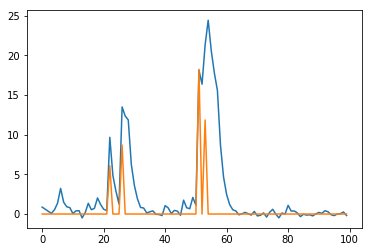

In [166]:
plt.plot(F[0, :, 0])
plt.plot(s)

In [303]:
np.hstack((np.zeros((F.shape[0], 1, F.shape[2])), F)).shape

(3200, 101, 50)

In [ ]:
oasis.functions.deconvolve()

In [277]:
np.argmax(S[:, 0, 0])

2143

In [276]:
F.mean(axis=0).mean(axis=-1)

array([0.25040292, 0.43286017, 0.56494198, 0.65570623, 0.72241929,
       0.77029287, 0.80294405, 0.82793935, 0.845531  , 0.85673511,
       0.86476349, 0.86985163, 0.87402795, 0.87751818, 0.88062681,
       0.88316733, 0.88427552, 0.88633886, 0.88785649, 0.8885423 ,
       0.88665101, 0.88715689, 0.88517797, 0.88601149, 0.88595051,
       0.88920903, 0.88691246, 0.88724903, 0.88791105, 0.8911309 ,
       0.8928073 , 0.89122888, 0.89096958, 0.89203343, 0.89227502,
       0.89504503, 0.89509242, 0.89540925, 0.89563926, 0.89714855,
       0.89743525, 0.89732792, 0.89571721, 0.8970374 , 0.89668513,
       0.89441641, 0.89561168, 0.89547486, 0.89430127, 0.89552025,
       0.89414029, 0.89625049, 0.89907547, 0.89855705, 0.89889704,
       0.89749222, 0.89881806, 0.89804059, 0.89961977, 0.89819283,
       0.9013227 , 0.90053542, 0.90019953, 0.89861516, 0.89758625,
       0.89819213, 0.89811525, 0.89929463, 0.90100055, 0.9019855 ,
       0.90049577, 0.89977081, 0.90219165, 0.90085564, 0.90249

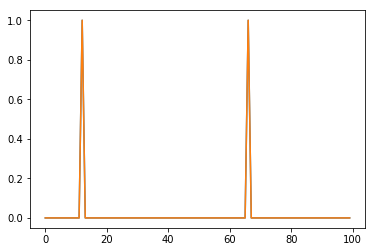

In [270]:
plt.plot(S[10, :, 10])
plt.plot(oS[10, :, 10])

In [167]:
data_dict['obs_tau_init']

array([47.34750022, 36.28531851, 45.81593966, 31.79051116, 41.82082056,
       49.22341872, 44.80847643, 43.54959061, 40.45324871, 48.02805564,
       39.56867257, 42.62801007, 39.04599834, 46.78990608, 31.88105671,
       45.61026881, 24.72734274, 34.13501614, 49.51258261, 40.86577141,
       35.2732107 , 41.7381198 , 36.25832264, 52.89739351, 36.65340925,
       33.59895353, 41.55316801, 40.00828578, 53.98717454, 56.67737084])

In [170]:
data_dict['obs_bias_init']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [171]:
data_dict['obs_gain_init']

array([3.26243287, 3.03838955, 2.91404636, 1.77986199, 1.57135491,
       2.53369883, 2.88490546, 1.73879423, 1.63521704, 1.64014921,
       3.42504161, 1.61391806, 1.72972552, 2.72524699, 1.76904627,
       4.60967632, 1.72067513, 1.58357996, 1.54529603, 2.74121195,
       1.67179611, 2.492671  , 2.3150392 , 1.6236562 , 2.53960061,
       2.0262574 , 3.31562146, 2.94796573, 2.84692264, 4.02142791])

In [172]:
data_dict['obs_var_init']

array([0.66521676, 0.57698819, 0.53072914, 0.19799429, 0.15432227,
       0.40122686, 0.52016747, 0.18896284, 0.16712092, 0.16813059,
       0.73318188, 0.16279572, 0.1869969 , 0.4641857 , 0.19559529,
       1.32806974, 0.18504518, 0.15673284, 0.14924624, 0.46964018,
       0.17468139, 0.38833805, 0.33496291, 0.16476622, 0.4030982 ,
       0.25660744, 0.6870841 , 0.54315637, 0.50656053, 1.01074265])

In [173]:
dt = data_dict['dt']

In [174]:
g = np.exp(-dt/0.3)

In [178]:
tau = -dt/np.log(g)

In [179]:
tau

0.5175327694260873

In [39]:
from synthetic_data import DynamicalSystem

In [76]:
class VanDerPol(DynamicalSystem):
    def __init__(self, num_inits= 1, mu=1.0, dt=1.0):
        self.mu = mu
        self.state_size = 2
        self.num_inits = num_inits
        self.state = np.random.randn(self.num_inits, self.state_size)
        self.dt = dt
                
    def gradient(self, state):
        u, v = state.T
        du = v
        dv = self.mu*(1-u**2)*v - u
        return np.array([du, dv]).T
        

In [198]:
D = VanDerPol(mu=5.0, dt=0.1)

In [199]:
y = D.integrate(burn_steps=100, num_steps=1000, inputs=None)

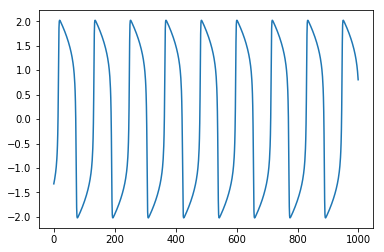

In [200]:
plt.plot(y[:, :, 0])

In [54]:
A = np.array([[1, 0, 2, 3], [2, -1, 1, 4], [-1, 4, 1, 0], [0, 4, 2, -1]])

In [55]:
np.linalg.det(A.T)

-31.0

In [49]:
np.linalg.det(A[1:, :-1])

1.9999999999999998

In [48]:
A[1:, :-1]

array([[ 2, -1,  1],
       [-1,  4,  1],
       [ 0,  4,  2]])

In [52]:
np.linalg.det(A[1:, [0, 1, 3]])

-8.999999999999998

In [53]:
A[1:, [0, 1, 3]]

array([[ 2, -1,  4],
       [-1,  4,  0],
       [ 0,  4,  1]])

In [65]:
x = np.linspace(-10, 10, 100)
y = 0.5 * np.log(20 - np.exp(2*x))

/home/luke/anaconda2/envs/pytorch11/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


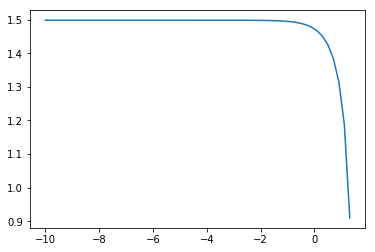

In [66]:
plt.plot(x, y)